In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import os
import joblib
import seaborn as sns
from keras.utils import pad_sequences
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import matthews_corrcoef
from mlxtend.evaluate import bias_variance_decomp
import matplotlib.pyplot as plt
from keras.models import save_model
from keras.utils import plot_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

2023-07-01 15:29:33.560277: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-01 15:29:33.718469: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/sanju/ns-allinone-2.35/otcl-1.14:/home/sanju/ns-allinone-2.35/lib
2023-07-01 15:29:33.718497: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-07-01 15:29:34.579604: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7';

In [2]:
X=[]
y=[]
base_path='dataset1/'
source_path=base_path
for child in os.listdir(source_path):
    sub_path = os.path.join(source_path, child)
    if os.path.isdir(sub_path):
        for data_file in os.listdir(sub_path):
            file_path = os.path.join(sub_path, data_file)
            print(file_path)
            data=pd.read_csv(file_path,header=None)
            print(data.shape)
            data=data.to_numpy()
            X.append(data)
            y.append(child)           

dataset1/0/01+39.csv
(30, 63)
dataset1/0/8.csv
(32, 63)
dataset1/0/1-13.csv
(32, 63)
dataset1/0/01+73.csv
(30, 63)
dataset1/0/01-35.csv
(30, 63)
dataset1/0/01-87.csv
(30, 63)
dataset1/0/01+100.csv
(29, 63)
dataset1/0/1-12.csv
(28, 63)
dataset1/0/01+25.csv
(35, 63)
dataset1/0/002-1.csv
(33, 63)
dataset1/0/01+43.csv
(33, 63)
dataset1/0/01+101.csv
(30, 63)
dataset1/0/5.csv
(32, 63)
dataset1/0/4-4.csv
(35, 63)
dataset1/0/1-3.csv
(28, 63)
dataset1/0/2-2.csv
(30, 63)
dataset1/0/1-4.csv
(35, 63)
dataset1/0/002-17.csv
(33, 63)
dataset1/0/01+94.csv
(30, 63)
dataset1/0/01+155.csv
(36, 63)
dataset1/0/01+42.csv
(30, 63)
dataset1/0/002-5.csv
(32, 63)
dataset1/0/01+169.csv
(32, 63)
dataset1/0/13.csv
(32, 63)
dataset1/0/2+5.csv
(32, 63)
dataset1/0/01+131.csv
(32, 63)
dataset1/0/01-97.csv
(30, 63)
dataset1/0/3+17.csv
(33, 63)
dataset1/0/001+11.csv
(36, 63)
dataset1/0/01+97.csv
(32, 63)
dataset1/0/14.csv
(31, 63)
dataset1/0/002-6.csv
(30, 63)
dataset1/0/01+5.csv
(35, 63)
dataset1/0/01+128.csv
(32, 63)


(42, 63)
dataset1/0/002+9.csv
(29, 63)
dataset1/0/1-15.csv
(30, 63)
dataset1/0/01-36.csv
(30, 63)
dataset1/0/002+16.csv
(30, 63)
dataset1/0/001+3.csv
(28, 63)
dataset1/0/01+113.csv
(30, 63)
dataset1/0/01+87.csv
(28, 63)
dataset1/0/01-55.csv
(30, 63)
dataset1/0/01-92.csv
(30, 63)
dataset1/0/001+15.csv
(30, 63)
dataset1/0/01+8.csv
(33, 63)
dataset1/0/3+8.csv
(32, 63)
dataset1/0/01+153.csv
(29, 63)
dataset1/0/01-81.csv
(42, 63)
dataset1/0/002+10.csv
(30, 63)
dataset1/0/01+122.csv
(42, 63)
dataset1/0/01+38.csv
(33, 63)
dataset1/0/004+8.csv
(32, 63)
dataset1/0/01-64.csv
(32, 63)
dataset1/0/01+21.csv
(42, 63)
dataset1/0/2-15.csv
(30, 63)
dataset1/0/002+6.csv
(30, 63)
dataset1/0/01+191.csv
(36, 63)
dataset1/0/01+104.csv
(36, 63)
dataset1/0/2+14.csv
(31, 63)
dataset1/0/01-72.csv
(33, 63)
dataset1/0/01+162.csv
(30, 63)
dataset1/0/01+80.csv
(30, 63)
dataset1/0/2-20.csv
(42, 63)
dataset1/0/2-1.csv
(33, 63)
dataset1/0/001+14.csv
(31, 63)
dataset1/0/1-16.csv
(30, 63)
dataset1/0/01-76.csv
(30, 63)
d

(38, 63)
dataset1/1/no-8.csv
(39, 63)
dataset1/1/90.csv
(57, 63)
dataset1/1/6.csv
(52, 63)
dataset1/1/0001-8.csv
(39, 63)
dataset1/1/002+143.csv
(43, 63)
dataset1/1/002+76.csv
(44, 63)
dataset1/1/001+68.csv
(45, 63)
dataset1/1/001+73.csv
(43, 63)
dataset1/1/74.csv
(45, 63)
dataset1/1/002+112.csv
(50, 63)
dataset1/1/002+111.csv
(50, 63)
dataset1/1/002+60.csv
(37, 63)
dataset1/1/002+49.csv
(46, 63)
dataset1/1/001+32.csv
(43, 63)
dataset1/1/001+89.csv
(54, 63)
dataset1/1/65.csv
(46, 63)
dataset1/1/31.csv
(46, 63)
dataset1/1/001+6.csv
(40, 63)
dataset1/1/no-7.csv
(43, 63)
dataset1/1/002+113.csv
(43, 63)
dataset1/1/002+28.csv
(47, 63)
dataset1/1/002+216.csv
(46, 63)
dataset1/1/no-9.csv
(38, 63)
dataset1/1/29.csv
(43, 63)
dataset1/1/001+105.csv
(47, 63)
dataset1/1/001+54.csv
(52, 63)
dataset1/1/002-3.csv
(38, 63)
dataset1/1/002+217.csv
(46, 63)
dataset1/1/69.csv
(35, 63)
dataset1/1/002+29.csv
(47, 63)
dataset1/1/001+93.csv
(47, 63)
dataset1/1/002+191.csv
(45, 63)
dataset1/1/66.csv
(43, 63)
d

(48, 63)
dataset1/1/16.csv
(48, 63)
dataset1/1/002+155.csv
(54, 63)
dataset1/1/002+200.csv
(53, 63)
dataset1/1/25.csv
(43, 63)
dataset1/1/0001-2.csv
(36, 63)
dataset1/1/001-4.csv
(39, 63)
dataset1/1/001+45.csv
(54, 63)
dataset1/1/no-3.csv
(38, 63)
dataset1/1/00-3.csv
(38, 63)
dataset1/1/81.csv
(45, 63)
dataset1/1/002+187.csv
(48, 63)
dataset1/1/2.csv
(42, 63)
dataset1/1/002+78.csv
(45, 63)
dataset1/1/001+63.csv
(53, 63)
dataset1/1/001+67.csv
(45, 63)
dataset1/1/004-3.csv
(38, 63)
dataset1/1/15.csv
(47, 63)
dataset1/1/53.csv
(51, 63)
dataset1/1/0001-17.csv
(43, 63)
dataset1/1/002+42.csv
(43, 63)
dataset1/1/35.csv
(46, 63)
dataset1/1/002+23.csv
(42, 63)
dataset1/1/0001-3.csv
(38, 63)
dataset1/1/67.csv
(49, 63)
dataset1/1/002+125.csv
(52, 63)
dataset1/1/57.csv
(52, 63)
dataset1/1/001+72.csv
(46, 63)
dataset1/1/002+168.csv
(40, 63)
dataset1/1/004-6.csv
(40, 63)
dataset1/1/002+107.csv
(57, 63)
dataset1/1/002+144.csv
(43, 63)
dataset1/1/002+120.csv
(52, 63)
dataset1/1/00-2.csv
(36, 63)
datas

In [3]:
y = np.array(y)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

In [15]:
max_review_length = 50
X_train = pad_sequences(X_train, maxlen=max_review_length)
X_test = pad_sequences(X_test, maxlen=max_review_length)

In [16]:
X_train = X_train.reshape(-1, 50* 63)
X_test = X_test.reshape(-1, 50* 63)

In [17]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
joblib.dump(scaler, 'scalerrf.pkl')

['scalerrf.pkl']

In [19]:
X_train=np.array(X_train)
y_train=np.array(y_train)

In [20]:
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

In [21]:
rf_classifier = RandomForestClassifier(n_estimators=100)

In [22]:
rf_classifier.fit(X_train, y_train)

/tmp/ipykernel_4101/31409248.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


RandomForestClassifier()

In [23]:
y_pred = rf_classifier.predict(X_test)

In [24]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.956


In [25]:
classification_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96       122
         1.0       1.00      0.91      0.96       128

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250



In [26]:
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC:", roc_auc)

ROC AUC: 0.95703125


In [27]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

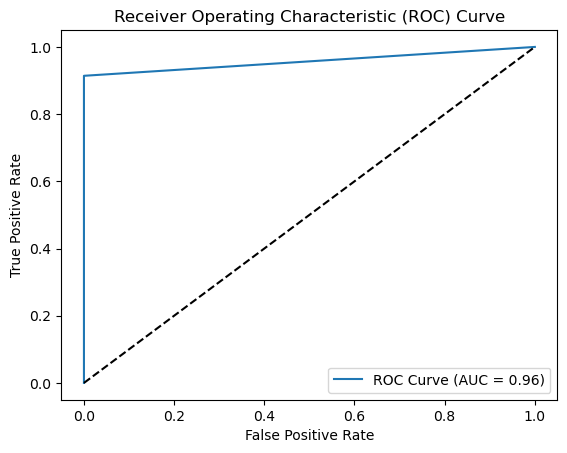

In [28]:
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [29]:
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[122   0]
 [ 11 117]]
